# Histogramas y discretizaciones

Un histograma de una lista de valores numéricos es una gráfica que indica la cantidad de elementos que pertenecen a cada una de las categorías creadas cortando el rango de valores en una serie de intervalos.

La función integrada en `matplotlib` para hacer histogramas es `plt.hist`

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

data = np.random.randn(1000)

In [21]:
?plt.hist

        plt.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)

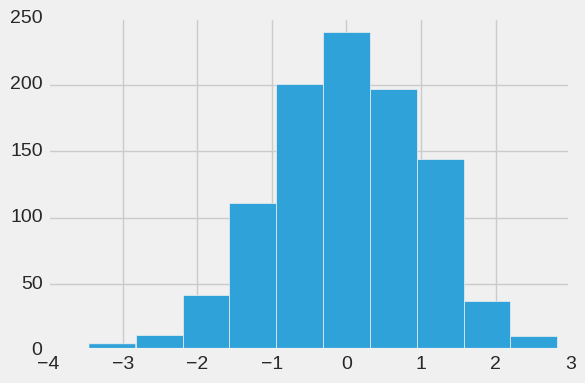

In [4]:
plt.hist(data);

Tenemos muchos parámetros para poder ajustar el histograma
        Parameters
        ----------
        x : (n,) array or sequence of (n,) arrays
            Input values, this takes either a single array or a sequency of
            arrays which are not required to be of the same length

        bins : integer or array_like, optional
            If an integer is given, `bins + 1` bin edges are returned,
            consistently with :func:`numpy.histogram` for numpy version >=
            1.3.

            Unequally spaced bins are supported if `bins` is a sequence.

            default is 10

        range : tuple or None, optional
            The lower and upper range of the bins. Lower and upper outliers
            are ignored. If not provided, `range` is (x.min(), x.max()). Range
            has no effect if `bins` is a sequence.

            If `bins` is a sequence or `range` is specified, autoscaling
            is based on the specified bin range instead of the
            range of x.

            Default is ``None``

        normed : boolean, optional
            If `True`, the first element of the return tuple will
            be the counts normalized to form a probability density, i.e.,
            ``n/(len(x)`dbin)``, i.e., the integral of the histogram will sum
            to 1. If *stacked* is also *True*, the sum of the histograms is
            normalized to 1.

            Default is ``False``

        weights : (n, ) array_like or None, optional
            An array of weights, of the same shape as `x`.  Each value in `x`
            only contributes its associated weight towards the bin count
            (instead of 1).  If `normed` is True, the weights are normalized,
            so that the integral of the density over the range remains 1.

            Default is ``None``

        cumulative : boolean, optional
            If `True`, then a histogram is computed where each bin gives the
            counts in that bin plus all bins for smaller values. The last bin
            gives the total number of datapoints.  If `normed` is also `True`
            then the histogram is normalized such that the last bin equals 1.
            If `cumulative` evaluates to less than 0 (e.g., -1), the direction
            of accumulation is reversed.  In this case, if `normed` is also
            `True`, then the histogram is normalized such that the first bin
            equals 1.

            Default is ``False``

        bottom : array_like, scalar, or None
            Location of the bottom baseline of each bin.  If a scalar,
            the base line for each bin is shifted by the same amount.
            If an array, each bin is shifted independently and the length
            of bottom must match the number of bins.  If None, defaults to 0.

            Default is ``None``

        histtype : {'bar', 'barstacked', 'step',  'stepfilled'}, optional
            The type of histogram to draw.

            - 'bar' is a traditional bar-type histogram.  If multiple data
              are given the bars are aranged side by side.

            - 'barstacked' is a bar-type histogram where multiple
              data are stacked on top of each other.

            - 'step' generates a lineplot that is by default
              unfilled.

            - 'stepfilled' generates a lineplot that is by default
              filled.

            Default is 'bar'

        align : {'left', 'mid', 'right'}, optional
            Controls how the histogram is plotted.

                - 'left': bars are centered on the left bin edges.

                - 'mid': bars are centered between the bin edges.

                - 'right': bars are centered on the right bin edges.

            Default is 'mid'

        orientation : {'horizontal', 'vertical'}, optional
            If 'horizontal', `~matplotlib.pyplot.barh` will be used for
            bar-type histograms and the *bottom* kwarg will be the left edges.

        rwidth : scalar or None, optional
            The relative width of the bars as a fraction of the bin width.  If
            `None`, automatically compute the width.

            Ignored if `histtype` is 'step' or 'stepfilled'.

            Default is ``None``

        log : boolean, optional
            If `True`, the histogram axis will be set to a log scale. If `log`
            is `True` and `x` is a 1D array, empty bins will be filtered out
            and only the non-empty (`n`, `bins`, `patches`) will be returned.

            Default is ``False``

        color : color or array_like of colors or None, optional
            Color spec or sequence of color specs, one per dataset.  Default
            (`None`) uses the standard line color sequence.

            Default is ``None``

        label : string or None, optional
            String, or sequence of strings to match multiple datasets.  Bar
            charts yield multiple patches per dataset, but only the first gets
            the label, so that the legend command will work as expected.

            default is ``None``

        stacked : boolean, optional
            If `True`, multiple data are stacked on top of each other If
            `False` multiple data are aranged side by side if histtype is
            'bar' or on top of each other if histtype is 'step'

            Default is ``False``

Los histogramas normalizados cumplen la característica de que el área de cada rectángulo es la cantidad de elementos que corresponden a esa categoría.

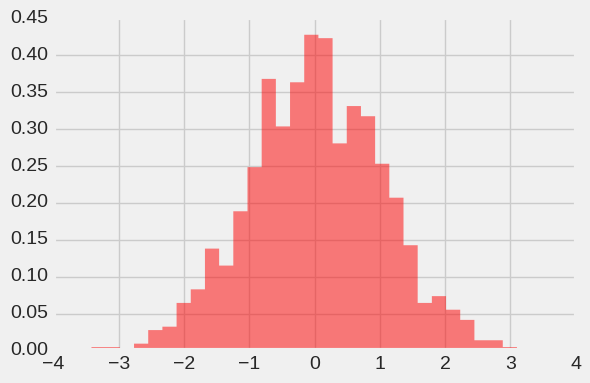

In [11]:
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='red',
         edgecolor='none');

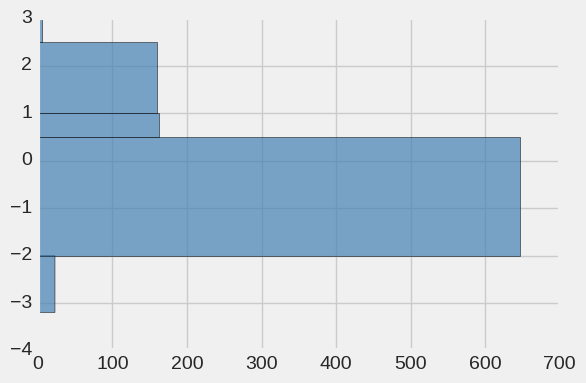

In [25]:
plt.hist(data, bins=[-3.2,-2,0.5,1,2.5,3], normed=False, alpha=0.7,
         histtype='barstacked', color='steelblue',
         orientation='horizontal',
         edgecolor='black');

Se pueden representar distintos histogramas en la misma figura para comparar distribuciones numéricas.

En Python, se pueden introducir los parámetros de cualquier función introducciendo al final de los argumentos introducidos a mano un diccionario precedido de  doble asterisco `**{diccionario de parámetros}`. A estos parámetros se les denota usualmente como `kwargs`.

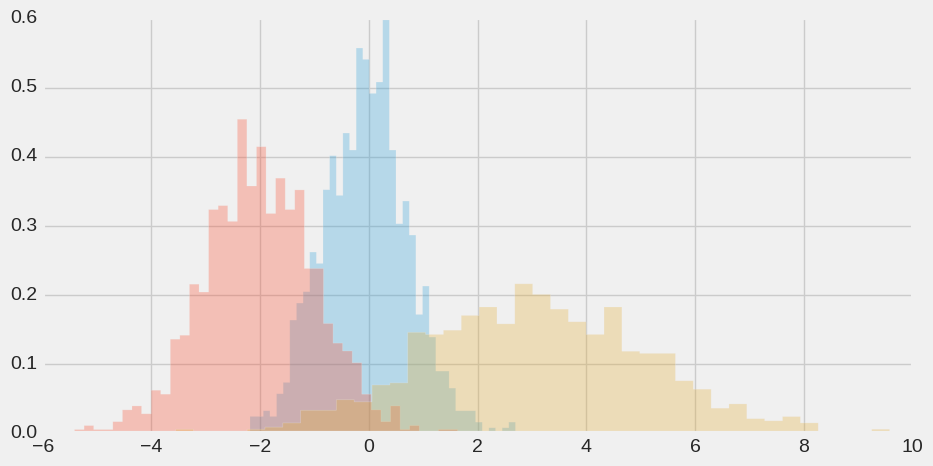

In [29]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.figure(figsize=(10,5))
plt.hist(x1, **kwargs);
plt.hist(x2, **kwargs);
plt.hist(x3, **kwargs);

En `Numpy` tenemos una opción que genera las categorías de los histogramas y las frecuencias de cada categoría , dada una secuencia ó un número de `bins`.

In [34]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts, '\n')
print(bin_edges)

[ 17 182 471 286  44] 

[-3.4186531  -2.11455304 -0.81045298  0.49364708  1.79774714  3.1018472 ]


In [35]:
counts, bin_edges = np.histogram(data, bins=[-3.2,-2,0.5,1,2.5,3],normed=True)
print(counts, '\n')
print(bin_edges)

[ 0.01168046  0.32857651  0.08277893  0.0812554   0.00253923] 

[-3.2 -2.   0.5  1.   2.5  3. ]


### Histogramas en 2 dimensiones

Representa un gráfico de densidad unido a histogramas en las variables (2 variables seleccionadas). La función `plt.hist2d`  es la responsable de ejecutarlo.

In [36]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

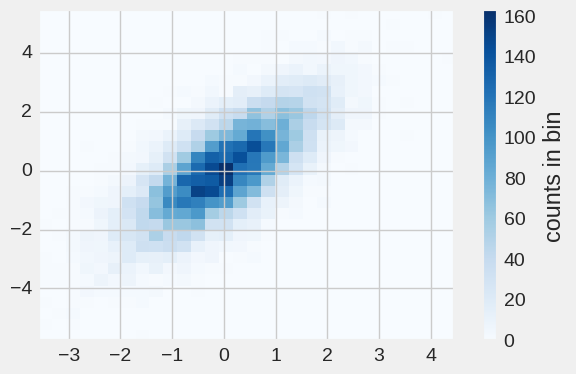

In [37]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

No ahondamos más en este tipo de gráficos ya que `Seaborn` los supera en facilidad y calidad.

<!--NAVIGATION-->
< [04 - gráficos de densidad y contorno](04 - gráficos de densidad y contorno.ipynb) || [06 - ajuste de leyendas,  colores, textos y anotaciones](06 - ajuste de leyendas,  colores, textos y anotaciones.ipynb) >